# Easy Visa (Visa Application Analysis and Classification)

## Overview

This project focuses on analyzing and predicting visa application outcomes using machine learning. The Office of Foreign Labor Certification (OFLC) processes thousands of applications for employers seeking to bring foreign workers into the U.S. every year. As the number of applications increases, it becomes increasingly tedious to manually review all cases.

This project aims to:
- Facilitate the process of visa approvals using a machine learning classification model.
- Recommend a suitable profile for applicants based on the significant factors that influence visa approval or denial.

## Objective

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions, a 9% increase from the previous year. Given this increasing number of applications, the goal of this project is to develop a **Machine Learning** solution that helps predict visa certification outcomes and shortlists candidates with a higher likelihood of approval.

## Dataset Description

The dataset contains attributes related to both the employee (foreign worker) and the employer. Below are key columns in the data:

- **case_id**: ID of each visa application.
- **continent**: Continent of the employee.
- **education_of_employee**: Employee's education level.
- **has_job_experience**: Indicates if the employee has previous job experience (Y/N).
- **requires_job_training**: Indicates if job training is required (Y/N).
- **no_of_employees**: Number of employees in the employer's company.
- **yr_of_estab**: Year the employer's company was established.
- **region_of_employment**: U.S. region where the foreign worker is employed.
- **prevailing_wage**: Average wage paid to similarly employed workers in the occupation area.
- **unit_of_wage**: Wage unit (Hourly, Weekly, Monthly, Yearly).
- **full_time_position**: Whether the position is full-time (Y/N).
- **case_status**: Visa certification status (Certified/Denied).

## Exploratory Data Analysis (EDA) Questions

The EDA seeks to answer key questions that will help us understand the drivers of visa certification:

1. **Education and Certification**: Does education level impact visa certification?
2. **Continent and Visa Status**: How does visa certification vary across different continents?
3. **Work Experience**: Does having job experience influence visa approval?
4. **Wage Unit**: Which wage unit (Hourly, Weekly, Monthly, Yearly) is most likely to lead to visa certification?
5. **Prevailing Wage**: How does visa status change with different levels of prevailing wage?

## Project Structure

- `data/`: Contains the raw dataset for visa applications.
- `notebooks/`: Jupyter notebooks used for data exploration, analysis, and modeling.
- `scripts/`: Python scripts for data preprocessing, feature engineering, and model training.
- `models/`: Directory to store trained models.
- `README.md`: Project documentation (this file).

## Machine Learning Approach

The classification model is designed to predict whether a visa application will be **certified** or **denied**. The following steps are taken:

1. **Data Preprocessing**: Cleaning the data, handling missing values, encoding categorical variables, and scaling numerical features.
2. **Feature Engineering**: Creating new features based on domain knowledge, such as grouping wage units or calculating the company's age.
3. **Model Selection**: Evaluating different classification models like Logistic Regression, Decision Trees, Random Forests, and Gradient Boosting Machines.
4. **Model Evaluation**: Using metrics such as accuracy, precision, recall, F1-score, and ROC-AUC to assess model performance.

## Results

- The final model demonstrates significant accuracy in predicting visa certification.
- Features such as **education level**, **work experience**, and **prevailing wage** are strong indicators of visa approval.


In [2]:
# install XgBoost
!pip install xgboost

In [3]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd
# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
# Library to help with statistical analysis
import scipy.stats as stats
from mpl_toolkits.mplot3d import axes3d
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from matplotlib.colors import ListedColormap
# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
    precision_recall_curve,
)
import statsmodels.api as sm
# To build model for prediction
from sklearn.linear_model import LogisticRegression
# Import standard scalar
from sklearn.preprocessing import StandardScaler
# import RFE
from sklearn.feature_selection import RFE
# To ignore unnecessary warnings
import warnings
warnings.filterwarnings("ignore")

In [4]:
# mount the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
path='/content/drive/MyDrive/Python Course'

In [6]:
# store pellete for future use
pellete='Set2'
colors = sns.color_palette(pellete)  # Get Set2 color palette for future use
sns.set(style="darkgrid") # Set grid style

## **Data Overview**

- Observe the first few rows of the dataset, to check whether the dataset has been loaded properly or not
- Get information about the number of rows and columns in the dataset
- Find out the data types of the columns to ensure that data is stored in the preferred format and the value of each property is as expected.
- Check the statistical summary of the dataset to get an overview of the numerical columns of the data
- Check for missing values
- Check for null values

In [7]:
# load the data in to panda dataframe
ez_df=pd.read_csv(f'{path}/EasyVisa.csv')

In [8]:
# Deep copy the dataframe
ezdf=ez_df.copy(deep=True)

In [9]:
# Detail info about the dataset
ezdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


### Observations:
The dataset contains 12 columns.  
Below is the summary:

#### Dataset Summary

| Column                               | Data Type | Non-Null Count | Description                               |
|--------------------------------------|-----------|----------------|-------------------------------------------|
| `case_id`                           | Object    | 25480          | Unique identifier for each case          |
| `continent`                         | Object    | 25480          | Continent of the employment region        |
| `education_of_employee`             | Object    | 25480          | Education level of the employee           |
| `has_job_experience`                | Object    | 25480          | Indicates if the employee has experience  |
| `requires_job_training`             | Object    | 25480          | Indicates if training is required         |
| `no_of_employees`                   | Int64     | 25480          | Number of employees in the organization   |
| `yr_of_estab`                       | Int64     | 25480          | Year of establishment                      |
| `region_of_employment`              | Object    | 25480          | Region of employment                       |
| `prevailing_wage`                   | Float64   | 25480          | Wage prevailing in the region             |
| `unit_of_wage`                      | Object    | 25480          | Unit of wage (hourly, yearly, etc.)      |
| `full_time_position`                | Object    | 25480          | Indicates if the position is full-time    |
| `case_status`                       | Object    | 25480          | Status of the case (approved, denied, etc.) |


In [10]:
# Check null values
ezdf.isnull().sum()

,0
case_id,0
continent,0
education_of_employee,0
has_job_experience,0
requires_job_training,0
no_of_employees,0
yr_of_estab,0
region_of_employment,0
prevailing_wage,0
unit_of_wage,0


In [11]:
ezdf.shape

(25480, 12)

### Observations:
There are 25480 rows and 12 colums in the dataset. The dataframe has no null value. Row 5 , 6 and 8 has numeric values.

In [12]:
ezdf.head(5)

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


### Observations:

#### Categorical Columns
- `case_id` (Object)
- `continent` (Object)
- `education_of_employee` (Object)
- `has_job_experience` (Object)
- `requires_job_training` (Object)
- `region_of_employment` (Object)
- `unit_of_wage` (Object)
- `full_time_position` (Object)
- `case_status` (Object)

#### Numerical Columns
- `no_of_employees` (Int64)
- `yr_of_estab` (Int64)
- `prevailing_wage` (Float64)

### Summary
- **Total Categorical Columns:** 9
- **Total Numerical Columns:** 3

In [13]:
# Check for duplicates in dataset
has_duplicates = ezdf.duplicated().any()

print(f"Does the DataFrame have duplicates? {has_duplicates}")

Does the DataFrame have duplicates? False


In [14]:
# Unique values
# Take all catgorical columns apart from case_id as this column seems to be unique column for joining or ref
catgoricalcol=ezdf.select_dtypes(include=['object']).columns[1:]
for col in catgoricalcol:
  print(f'Unique values in {col}:')
  print(ezdf[col].unique())

Unique values in continent:
['Asia' 'Africa' 'North America' 'Europe' 'South America' 'Oceania']
Unique values in education_of_employee:
['High School' "Master's" "Bachelor's" 'Doctorate']
Unique values in has_job_experience:
['N' 'Y']
Unique values in requires_job_training:
['N' 'Y']
Unique values in region_of_employment:
['West' 'Northeast' 'South' 'Midwest' 'Island']
Unique values in unit_of_wage:
['Hour' 'Year' 'Week' 'Month']
Unique values in full_time_position:
['Y' 'N']
Unique values in case_status:
['Denied' 'Certified']


### Observations:
#### Unique Values for Categorical Columns

- **Continent:**
  - `['Asia', 'Africa', 'North America', 'Europe', 'South America', 'Oceania']`
  
- **Education of Employee:**
  - `['High School', "Master's", "Bachelor's", 'Doctorate']`
  
- **Has Job Experience:**
  - `['N', 'Y']`
  
- **Requires Job Training:**
  - `['N', 'Y']`
  
- **Region of Employment:**
  - `['West', 'Northeast', 'South', 'Midwest', 'Island']`
  
- **Unit of Wage:**
  - `['Hour', 'Year', 'Week', 'Month']`
  
- **Full-Time Position:**
  - `['Y', 'N']`
  
- **Case Status:**
  - `['Denied', 'Certified']`


In [15]:
# Printing no of values in each of these catgorical variable
for col in catgoricalcol:
  print(f'No of values in each {col}:')
  print(ezdf[col].value_counts(normalize=True)*100)

No of values in each continent:
continent
Asia             66.173469
Europe           14.646782
North America    12.919937
South America     3.343799
Africa            2.162480
Oceania           0.753532
Name: proportion, dtype: float64
No of values in each education_of_employee:
education_of_employee
Bachelor's     40.164835
Master's       37.810047
High School    13.422292
Doctorate       8.602826
Name: proportion, dtype: float64
No of values in each has_job_experience:
has_job_experience
Y    58.092622
N    41.907378
Name: proportion, dtype: float64
No of values in each requires_job_training:
requires_job_training
N    88.402669
Y    11.597331
Name: proportion, dtype: float64
No of values in each region_of_employment:
region_of_employment
Northeast    28.237834
South        27.539246
West         25.847724
Midwest      16.903454
Island        1.471743
Name: proportion, dtype: float64
No of values in each unit_of_wage:
unit_of_wage
Year     90.117739
Hour      8.465463
Week      1.06

### Observations:
- Highest number of visa applications are from Asia (66%)
- Most of the people who applied for visa have bachelors degree(40%)
- Most of the pople has experienced  in the job which they are apply for in abroad.(58%)
- Most of the people who applied for visa doesnot need any trainings(88%).We can assume that as people are experienced so they might not be needing trainings
- Northeast region employment has highest no of visa though other regions are not far behind(28%)
- Around 90% of peoplew who applied for visa are applying job on yearly wage rate
- Most of the people who applied for visa are for full time employment(89%)
- The approval  rate of visa is much higher the rejection (66%)


In [16]:
ezdf.describe(exclude='object').T

,count,mean,std,min,25%,50%,75%,max
no_of_employees,25480.0,5667.043210,22877.928848,-26.0000,1022.00,2109.00,3504.0000,602069.00
yr_of_estab,25480.0,1979.409929,42.366929,1800.0000,1976.00,1997.00,2005.0000,2016.00
prevailing_wage,25480.0,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27


### Observations:
- The min value for no_of_employees is -26 (This seems to be an problem as nagative of employees does not make sense it)
- There is huge gap between 75% in no of employees i.e 3504 where as max value is 602069 .This might be due to large orginzation who has more man power.
- Average prevailing wage is $74455.There's also a very huge difference in 75th percentile and maximum value.SO there might be some outliers.
- The oldest company who has applied for visa for its employee is established in 1800



In [17]:
# Filter all values with nagative number of employees
ezdf[ezdf['no_of_employees']<0]

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
245,EZYV246,Europe,Master's,N,N,-25,1980,Northeast,39452.9900,Year,Y,Certified
378,EZYV379,Asia,Bachelor's,N,Y,-11,2011,Northeast,32506.1400,Year,Y,Denied
832,EZYV833,South America,Master's,Y,N,-17,2002,South,129701.9400,Year,Y,Certified
2918,EZYV2919,Asia,Master's,Y,N,-26,2005,Midwest,112799.4600,Year,Y,Certified
6439,EZYV6440,Asia,Bachelor's,N,N,-14,2013,South,103.9700,Hour,Y,Denied
6634,EZYV6635,Asia,Bachelor's,Y,N,-26,1923,West,5247.3200,Year,Y,Denied
7224,EZYV7225,Europe,Doctorate,N,N,-25,1998,Midwest,141435.9500,Year,Y,Certified
7281,EZYV7282,Asia,High School,N,N,-14,2000,Midwest,58488.5000,Year,Y,Denied
7318,EZYV7319,Asia,Bachelor's,Y,Y,-26,2006,South,115005.6100,Year,Y,Certified
7761,EZYV7762,Asia,Master's,N,N,-11,2009,Midwest,38457.5100,Year,Y,Certified


### Observations:
We cannot drop these rows directly as only one field **no_of_employees** have this issue where as other fields might ve playing significant role if visa is certified or denied .We will make those nagative values as positive assuming that someone might have put nagative as hyphen by mistake

In [18]:
# Take absolute of the no of employees to remove nagative
ezdf['no_of_employees']=ezdf['no_of_employees'].apply(lambda x: abs(x))

In [19]:
ezdf.describe(include='object').T

,count,unique,top,freq
case_id,25480,25480,EZYV01,1
continent,25480,6,Asia,16861
education_of_employee,25480,4,Bachelor's,10234
has_job_experience,25480,2,Y,14802
requires_job_training,25480,2,N,22525
region_of_employment,25480,5,Northeast,7195
unit_of_wage,25480,4,Year,22962
full_time_position,25480,2,Y,22773
case_status,25480,2,Certified,17018


### Insights from Categorical Columns
1. **Continent:**
   - **Unique Values:** 6 (Asia, Africa, North America, Europe, South America, Oceania)
   - **Most Frequent Value:** Asia (16,861 occurrences)
   - **Insight:** A significant proportion of cases are concentrated in Asia, suggesting a possible focus area for analysis or resource allocation.

2. **Education of Employee:**
   - **Unique Values:** 4 (High School, Bachelor's, Master's, Doctorate)
   - **Most Frequent Value:** Bachelor's degree (10,234 occurrences)
   - **Insight:** The majority of employees have a Bachelor's degree, which may imply a workforce that is moderately educated, with potential implications for job requirements and training needs.

3. **Job Experience:**
   - **Unique Values:** 2 (Yes, No)
   - **Most Frequent Value:** Yes (14,802 occurrences)
   - **Insight:** A substantial number of employees possess job experience, indicating a more skilled workforce that could reduce training time and costs.

4. **Job Training Requirement:**
   - **Unique Values:** 2 (Yes, No)
   - **Most Frequent Value:** No (22,525 occurrences)
   - **Insight:** A majority of cases do not require job training, suggesting that the workforce may already be well-trained or that job roles typically do not demand extensive training.

5. **Region of Employment:**
   - **Unique Values:** 5 (West, Northeast, South, Midwest, Island)
   - **Most Frequent Value:** Northeast (7,195 occurrences)
   - **Insight:** The Northeast region has the highest representation.
6. **Unit of Wage:**
   - **Unique Values:** 4 (Hour, Year, Week, Month)
   - **Most Frequent Value:** Year (22,962 occurrences)
   - **Insight:** Most employees are compensated on an annual basis, which is typical for salaried positions, indicating a potential need to analyze wage structures and salary ranges.

7. **Full-Time Position:**
   - **Unique Values:** 2 (Yes, No)
   - **Most Frequent Value:** Yes (22,773 occurrences)
   - **Insight:** The majority of cases are full-time positions, which could reflect workforce stability and employee retention strategies.

8. **Case Status:**
   - **Unique Values:** 2 (Certified, Denied)
   - **Most Frequent Value:** Certified (17,018 occurrences)
   - **Insight:** A large number of cases are certified, which may indicate effective application processes or favorable conditions for approval.

### Utils

In [20]:
def plot_bar_chart_percentage(df, column_name, xlabel, pellete, bar_width=0.6):
    """
    Plots the percentage distribution of a specified categorical column in a DataFrame.

    Parameters:
    - df: DataFrame containing the data.
    - column_name: The name of the column to analyze.
    - colors: List of colors for the bar plot.
    - figsize: Tuple specifying the figure size.
    - bar_width: Width of the bars in the bar plot.
    """
    # Calculate the percentage of each category in the specified column
    percentages = df[column_name].value_counts(normalize=True)*100
    percentages = percentages.reset_index().rename(columns={ column_name: column_name, 'proportion': 'percent'})
    n=df[column_name].nunique()
    # Increase figure size for better readability
    plt.figure(figsize=(n+1,6))

    # Plot the bar plot with reduced bar width
    ax=sns.barplot(x=column_name, y='percent', data=percentages, palette=pellete,hue=column_name, width=bar_width)

    # Annotate the plot with the count values
    annotate_chart(plt, ax)

    # Set labels and title
    plt.ylabel('Percentage')
    plt.xlabel(xlabel)
    plt.title(f'Overview of {xlabel}')
    plt.xticks(rotation=45)

    # Show the plot
    plt.tight_layout()  # Adjust layout to prevent overlapping
    plt.legend([],[], frameon=False)
    plt.show()


In [21]:
def plot_pie_chart_with_legend(df, column, title=None, colors=None):
    """
    Creates a pie chart with a legend showing the share of each category in a column.

    Parameters:
    - df (DataFrame): The DataFrame containing the data.
    - column (str): The column name for which the pie chart will be created.
    - title (str, optional): Title of the pie chart. Default is "Market Segment Proportions".
    - colors (list, optional): List of colors for the pie chart wedges. If not provided, default pastel colors will be used.

    Returns:
    - plt (matplotlib.pyplot): The matplotlib plot object.
    """
    # Calculate proportions
    proportions = df[column].value_counts(normalize=True)

    # Create the pie chart without annotations
    plt.pie(proportions, labels=None, colors=colors, wedgeprops={'edgecolor': 'white'})

    # Generate legend labels with percentages
    legend_labels = [f'{label}: {percent:.1%}' for label, percent in zip(proportions.index, proportions)]

    # Add the legend
    plt.legend(legend_labels, loc='best', title=column.replace('_', ' ').title())

    # Add title and adjust layout
    plt.title(title)
    plt.tight_layout()

    # Return the plot
    return plt

In [63]:
def plot_histogram_and_boxplot(df, column, xlabel, ylabel, title):
    """
    Plots a histogram with KDE and a box plot for a specified column in a DataFrame.

    Parameters:
    df (DataFrame): The DataFrame containing the data.
    column (str): The column name for which the plots are to be drawn.
    xlabel (str): The label for the x-axis.
    ylabel (str): The label for the y-axis.
    title (str): The title for the graph.
    Returns:
    None
    """
    # Calculate percentiles
    q25 = df[column].quantile(0.25)
    q50 = df[column].quantile(0.50)
    q75 = df[column].quantile(0.75)
    mean_value = df[column].mean()
    # Create the figure and set the size
    f, (hist, box) = plt.subplots(nrows=2, sharex=True, figsize=(8, 10))

    # Create the histogram with KDE
    sns.histplot(data=df, x=column, ax=hist, kde=True, legend=True, color='lightcoral')
    hist.set_xlabel(xlabel)
    hist.axvline(mean_value, color='peru', linestyle=':', label='Mean')
    hist.axvline(q25, color='green', linestyle='--', label='25th percentile')
    hist.axvline(q50, color='blue', linestyle='-', label='50th percentile (Median)')
    hist.axvline(q75, color='purple', linestyle='--', label='75th percentile')
    hist.set_ylabel(ylabel)
    hist.legend()

    # Create the box plot in a subplot below the histogram
    sns.boxplot(data=df, x=column, ax=box, color='lightcoral')
    box.axvline(mean_value, color='peru', linestyle=':', label=f'Mean: {mean_value:.2f}')
    box.axvline(q25, color='green', linestyle='--', label=f'25th percentile: {q25:.2f}')
    box.axvline(q50, color='blue', linestyle='-', label=f'50th percentile: {q50:.2f}')
    box.axvline(q75, color='purple', linestyle='--', label=f'75th percentile: {q75:.2f}')

    # Setting the x-label and title on the shared axis and figure
    box.set_xlabel(xlabel)
    f.suptitle(title)

    # Adjust layout and show the combined plots
    f.tight_layout(rect=[0, 0, 1, 0.95])
    box.legend()  # Add legend to the box plot for the percentiles


In [23]:
def draw_count_plot(df, x, xlabel, ylabel, title, hue=None):
    """
    Draws a count plot for a specified column in a DataFrame.

    Parameters:
    - df (DataFrame): The DataFrame containing the data.
    - x (str): The column name to be used for the x-axis categories.
    - xlabel (str): The label for the x-axis.
    - ylabel (str): The label for the y-axis.
    - title (str): The title for the plot.
    - hue (str, optional): The column name to be used for hue (categorical separation). Default is None.

    Returns:
    - plt (matplotlib.pyplot): The matplotlib plot object.
    """
    # Create the plot
    count=df[x].nunique()
    plt.figure(figsize=(count + 1, 4))
    ax = sns.countplot(data=df, x=x, hue=hue, palette='Set2')
    plt.xticks(rotation=45)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)

    # Annotate the plot with the count values
    annotate_chart(plt, ax)

    return plt

In [24]:
def annotate_chart(plot, ax):
    """
    Annotates a chart with the height of each bar.

    Parameters:
    - plot (matplotlib.pyplot): The matplotlib plot object.
    - ax (Axes): The Axes object to annotate.
    """
    for p in ax.patches:
        height = p.get_height()

        # Only annotate if height is significant, and avoid zero or near-zero annotations
        if height > 0.001:
            plot.annotate(f'{format(height, ".1f")}% ',          # Annotate with 1 decimal places
                          (p.get_x() + p.get_width() / 2., height),  # Position the annotation at the top of the bar
                          ha='center', va='center',       # Center the annotation
                          xytext=(0, 4),                  # Small offset to avoid overlapping with the bar
                          textcoords='offset points')


In [25]:
def plot_stacked_bar_with_annotations(df, x, y, normalize='index', figsize=(8, 6), show_legend=True,show_annot=True, ax=None):
    """
    Creates a stacked bar plot with pastel colors and annotates each bar with proportion values.

    Parameters:
    - df (DataFrame): The DataFrame containing the data.
    - x (str): The column name to be used for the x-axis categories.
    - y (str): The column name to be used for the y-axis categories.
    - normalize (str, optional): Normalizes the values to proportions. Default is 'index'.
    - figsize (tuple, optional): The size of the figure. Default is (8, 6).
    - show_legend (bool, optional): Whether to show the legend. Default is True.
    - ax (matplotlib.axes.Axes, optional): An existing axes object for plotting. Default is None.

    Returns:
    - ax (matplotlib.axes.Axes): The axes object containing the plot.
    """
    # Create the crosstab
    crosstab = pd.crosstab(df[x], df[y], normalize=normalize) * 100
    crosstab.round(1)
    # Create the plot on the provided ax or create a new one if ax is None
    if ax is None:
        fig, ax = plt.subplots(figsize=figsize)

    crosstab.plot(kind='bar', stacked=True, ax=ax, color=['#66c2a5', '#fc8d62'])

    # Add labels to the axes
    formatted_string = ' '.join(word.capitalize() for word in x.split('_'))
    ax.set_xlabel(formatted_string)
    ax.set_ylabel('Proportion' if normalize else 'Count')
    ax.set_title(f'Proportion of {y} by {x}' if normalize else f'Count of {y} by {x}')

    # Annotate the bars with proportion or count values
    if show_annot:
      for container in ax.containers:
          ax.bar_label(container, label_type='center', fmt='%.1f', labels=[f'{v:.1f}' if v > 0 else '' for v in container.datavalues])


    # Show or remove the legend based on the show_legend parameter
    if not show_legend:
        ax.legend().remove()

    return ax

In [26]:
def create_stacked_bar_subplots(df, columns, y, n_cols=2):
    """
    Creates stacked bar subplots for the specified columns with a common legend.

    Parameters:
    - df (DataFrame): The DataFrame containing the data.
    - columns (list): List of column names to plot on the x-axis.
    - y (str): The column name to plot on the y-axis.
    - n_cols (int, optional): Number of columns for the subplot layout (default is 2).
    """
    n_rows = (len(columns) + n_cols - 1) // n_cols  # Calculate the number of rows needed

    # Create a figure with adjusted size
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, n_rows * 5))

    # Flatten the axes array for easy iteration
    axes = axes.flatten()

    # Loop through each column and create a subplot for it
    for i, col in enumerate(columns):
        ax = axes[i]  # Get the correct axis
        plot_stacked_bar_with_annotations(df=df, x=col, y=y, ax=ax,show_legend=False)

    # Hide any unused axes
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    # Get the handles and labels from one of the plots (to add the common legend)
    handles, labels = axes[0].get_legend_handles_labels()

    # Add a common legend below the subplots
    fig.legend(handles, labels, loc='lower center', ncol=2, bbox_to_anchor=(0.5, -0.05))

    # Adjust layout to avoid overlap
    plt.tight_layout(pad=3.0, h_pad=3.0, w_pad=3.0)

    # Show the plot
    plt.show()

In [27]:
def plot_boxplot(df, x_col, y_col, hue_col=None, title=None, xlabel=None, figsize=(8, 5), xticks_rotation=90):
    """
    Creates a box plot to visualize the relationship between variables.

    Parameters:
    - df: pandas DataFrame containing the data.
    - x_col: str, column name for the x-axis.
    - y_col: str, column name for the y-axis.
    - hue_col: str, column name for grouping by color (optional).
    - title: str, title of the plot (optional).
    - xlabel: str, label for the x-axis (optional).
    - figsize: tuple, size of the figure (default is (8, 5)).
    - xticks_rotation: int, rotation angle for x-axis tick labels (default is 90).
      Returns:
    - plt (matplotlib.pyplot): The matplotlib plot object with annotations.
    """

    plt.figure(figsize=figsize)  # Set the figure size
    bxp = sns.boxplot(data=df, x=x_col, y=y_col, hue=hue_col,palette="Set2")  # Create the box plot

    if xlabel:
        bxp.set_xlabel(xlabel)  # Set x-axis label if provided
    if title:
        bxp.axes.set_title(title)  # Set the plot title if provided

    plt.xticks(rotation=xticks_rotation)  # Rotate x-axis labels
    return plt


In [28]:
def draw_box_plot_with_legend(df, x, xlabel, color='red'):
    """
    Draws a box plot with a vertical line indicating the mean value and includes a legend.

    Parameters:
    - df (pandas.DataFrame): The DataFrame containing the data to plot.
    - x (str): The name of the column in the DataFrame to be plotted.
    - xlabel (str): The label for the x-axis.
    - color (str, optional): The color of the box plot. Default is 'red'.

    Returns:
    - plt (matplotlib.pyplot): The matplotlib pyplot object for further customization or saving.
    """
    mean_value = df[x].mean()
    sns.boxplot(data=df, x=x, color=color)
    plt.xlabel(xlabel)
    plt.axvline(mean_value, color='green', linestyle=':', label=f'Mean: {mean_value:.2f}')
    plt.legend()
    return plt

In [29]:
def plot_box_plot_side_by_side(df, x, xlabel, category_col, color='red'):
    """
    Plots side-by-side box plots for different categories in a DataFrame.

    Parameters:
    - df (pandas.DataFrame): The DataFrame containing the data to plot.
    - x (str): The name of the column in the DataFrame to be plotted.
    - xlabel (str): The label for the x-axis.
    - category_col (str): The column name in the DataFrame used to categorize the data.
    - color (str, optional): The color of the box plot. Default is 'red'.

    Returns:
    - plt (matplotlib.pyplot): The matplotlib pyplot object for further customization or saving.
    """
    # Extract unique categories
    categories = df[category_col].unique()

    # Create subplots with 1 row and the number of columns equal to the number of categories
    fig, axes = plt.subplots(1, len(categories), figsize=(12, 6))

    # Loop over each category and plot
    for i, category in enumerate(categories):
        plt.sca(axes[i])  # Set the current axes
        subset = df[df[category_col] == category]
        draw_box_plot_with_legend(subset, x, xlabel, color=color)
        axes[i].set_title(f'{category.capitalize()}')

    plt.tight_layout()
    return plt

In [30]:
def create_catplot_with_annotations(df, x, hue, col, colors, height=4, aspect=1, title="Catplot with Annotations", annotation_color='b'):
    """
    Creates a catplot with count kind, a color palette, axis labels, title, and annotations.

    Parameters:
    df (pd.DataFrame): The DataFrame containing the data.
    x (str): The name of the column for the x-axis.
    hue (str): The name of the column for hue.
    col (str): The name of the column for creating subplots.
    colors (tuple): A tuple of two colors for the palette.
    height (int): The height of each facet (default is 4).
    aspect (float): Aspect ratio of each facet (default is 1).
    title (str): The title of the plot (default is "Catplot with Annotations").
    annotation_color (str): The color of the annotations (default is 'b').
    """
    # Create the catplot
    catplot = sns.catplot(data=df, x=x, hue=hue, col=col, kind='count', height=height, aspect=aspect, palette=colors)

    # Set axis labels and title
    catplot.set_axis_labels(x, 'Count')
    catplot.set_titles(col_template="{col_name}")
    catplot.fig.suptitle(title, y=1.02)  # Title with a bit of padding

    # Add annotations with specified color
    for ax in catplot.axes.flat:
        for p in ax.patches:
            height = p.get_height()
            ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2, height),
                        ha='center', va='center', xytext=(0, 10), textcoords='offset points',
                        color=annotation_color)

In [31]:
def distribution_plot_wrt_target(data, predictor, target, xlabel1, xlabel2):
    """
    Plots the distribution of a predictor variable with respect to a target variable.

    This function creates a 2x2 grid of plots, including:
    1. Histograms with KDE for each unique value of the target variable.
    2. A boxplot showing the distribution of the predictor variable grouped by the target variable.
    3. A boxplot showing the distribution of the predictor variable grouped by the target variable without outliers.

    Parameters:
    - data (DataFrame): The input DataFrame containing the data.
    - predictor (str): The name of the predictor variable (column) to visualize.
    - target (str): The name of the target variable (column) to group the data by.
    - xlabel1 (str): Label for the x-axis of the first histogram.
    - xlabel2 (str): Label for the x-axis of the second histogram.

    Returns:
    - None: Displays the plots but does not return any values.
    """

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    # Histogram for the first unique target value
    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color=colors[0],
        stat="density",
    )
    axs[0, 0].set_xlabel(xlabel1)

    # Histogram for the second unique target value
    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color=colors[1],
        stat="density",
    )
    axs[0, 1].set_xlabel(xlabel2)

    # Boxplot with outliers
    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], color=colors[0])

    # Boxplot without outliers
    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        color=colors[1],
        showmeans=True
    )

    plt.tight_layout()
    plt.show()


In [32]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification_sklearn(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred_temp = (model.predict_proba(predictors))[:, 1] > threshold
    # rounding off the above values to get classes
    pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [33]:
# defining a function to plot the confusion_matrix of a classification model
def confusion_matrix_sklearn(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    # checking which probabilities are greater than threshold
    pred_temp = (model.predict_proba(predictors))[:, 1] > threshold
    # rounding off the above values to get classes
    y_pred = np.round(pred_temp)

    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [34]:
def split_train_test(data, target_column, test_size=0.3, random_state=1, add_constant=False, drop_first=True):
    """
    Splits the dataset into training and test sets, with an option to add a constant and create dummy variables.

    Parameters:
    - data (DataFrame): The full DataFrame containing the features and target.
    - target_column (str): The name of the target column to predict.
    - test_size (float, optional): The proportion of the data to include in the test split. Default is 0.3.
    - random_state (int, optional): Controls the shuffling applied to the data before splitting. Default is 1.
    - add_constant (bool, optional): If True, adds a constant (intercept) to the feature set. Default is False.
    - drop_first (bool, optional): If True, drop the first category in the dummy variable encoding to avoid multicollinearity. Default is True.

    Returns:
    - X_train (DataFrame): Training features.
    - X_test (DataFrame): Test features.
    - y_train (Series): Training target.
    - y_test (Series): Test target.
    """
    # Separate target and features
    X = data.drop([target_column], axis=1)
    Y = data[target_column]

    # Add constant if specified
    if add_constant:
        X = sm.add_constant(X)

    # Create dummy variables
    X = pd.get_dummies(X, drop_first=drop_first)

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=random_state)

    return X_train, X_test, y_train, y_test

In [35]:
def print_dataset_shapes_and_class_distribution(X_train, X_test, y_train, y_test):
    """
    Print the shapes of training and test datasets, along with the percentage of classes in each set.

    Parameters:
    X_train (DataFrame): Training feature set.
    X_test (DataFrame): Test feature set.
    y_train (Series): Training target set.
    y_test (Series): Test target set.
    """
    # Shape of Test and Train Data
    print("Shape of Training set:", X_train.shape)
    print("Shape of Test set:", X_test.shape)

    # Percentage of classes in training set
    print("\nPercentage of classes in Training set:")
    print(y_train.value_counts(normalize=True))

    # Percentage of classes in test set
    print("\nPercentage of classes in Test set:")
    print(y_test.value_counts(normalize=True))

In [36]:
def compare_model_performance(train_performance, test_performance, model_names, mode='both'):
    """
    Combines and compares training and test performance metrics for models.

    Parameters:
    - train_performance (list of DataFrames): A list of DataFrames containing training performance metrics.
    - test_performance (list of DataFrames): A list of DataFrames containing test performance metrics.
    - model_names (list of str): List of model names or descriptions for labeling columns.
    - mode (str): Mode of comparison, either 'both' (default), 'train', or 'test'.

    Returns:
    - pd.DataFrame: A DataFrame combining the performance metrics for comparison.
    """

    # Concatenate training and test performance DataFrames
    if mode == 'both':
        train_df = pd.concat(train_performance, axis=1)
        test_df = pd.concat(test_performance, axis=1)

        # Add model names as column labels
        train_df.columns = [f"{name} (Train)" for name in model_names]
        test_df.columns = [f"{name} (Test)" for name in model_names]

        # Combine train and test into one DataFrame
        combined_df = pd.concat([train_df, test_df], keys=['Train', 'Test'], axis=1)
    elif mode == 'train':
        combined_df = pd.concat(train_performance, axis=1)
        combined_df.columns = model_names
    elif mode == 'test':
        combined_df = pd.concat(test_performance, axis=1)
        combined_df.columns = model_names

    return combined_df

In [37]:
# Printing no of values in each of these catgorical variable
for col in catgoricalcol:
  print(f'No of values in each {col}:')
  print(ezdf[col].value_counts(normalize=True)*100)

No of values in each continent:
continent
Asia             66.173469
Europe           14.646782
North America    12.919937
South America     3.343799
Africa            2.162480
Oceania           0.753532
Name: proportion, dtype: float64
No of values in each education_of_employee:
education_of_employee
Bachelor's     40.164835
Master's       37.810047
High School    13.422292
Doctorate       8.602826
Name: proportion, dtype: float64
No of values in each has_job_experience:
has_job_experience
Y    58.092622
N    41.907378
Name: proportion, dtype: float64
No of values in each requires_job_training:
requires_job_training
N    88.402669
Y    11.597331
Name: proportion, dtype: float64
No of values in each region_of_employment:
region_of_employment
Northeast    28.237834
South        27.539246
West         25.847724
Midwest      16.903454
Island        1.471743
Name: proportion, dtype: float64
No of values in each unit_of_wage:
unit_of_wage
Year     90.117739
Hour      8.465463
Week      1.06

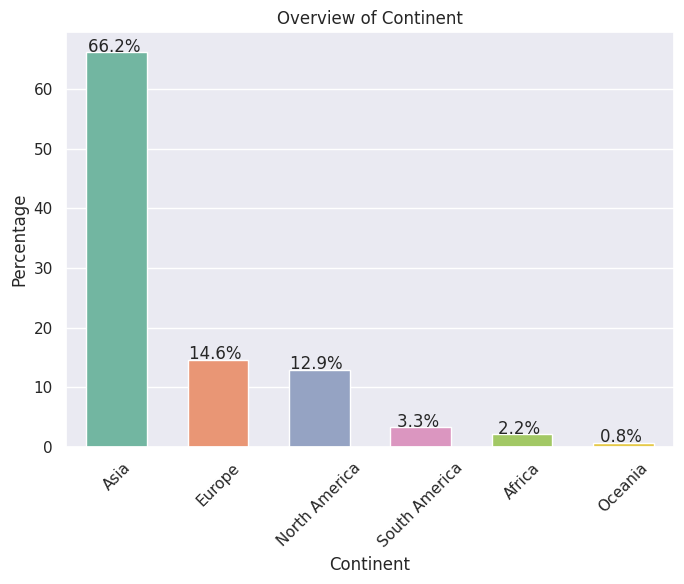

In [38]:
# Bar chart on continent to see number of application on each
plot_bar_chart_percentage(ezdf,'continent','Continent',pellete=pellete)

### Observations:
- Highest number of visa applications are from Asia (66%) followed by Eurupe(14.6%) and North America (12.9%)
- Oceania is least number visa application which is only (0.8%).South Africa and Africa also does not have much visa applications

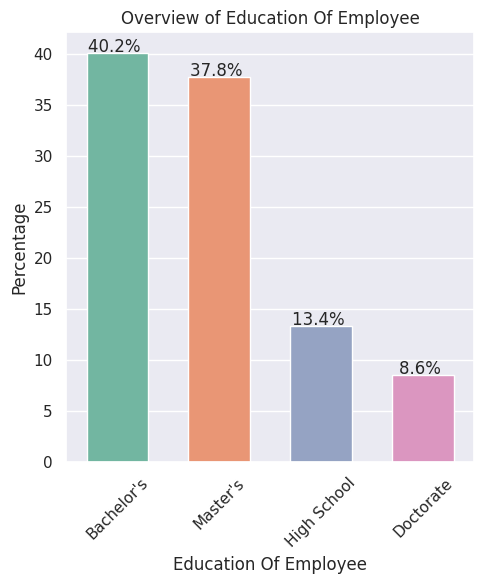

In [39]:
# Bar chart on education_of_employee to check which degree has highest visa application
plot_bar_chart_percentage(ezdf,'education_of_employee','Education Of Employee',pellete=pellete)

### Observations:
The majority of the applicants have a Bachelor's degree (40%) followed by masters degree 37.8% while a small portion of them either have a doctorate (8.6%) or high school degree (13.4%)

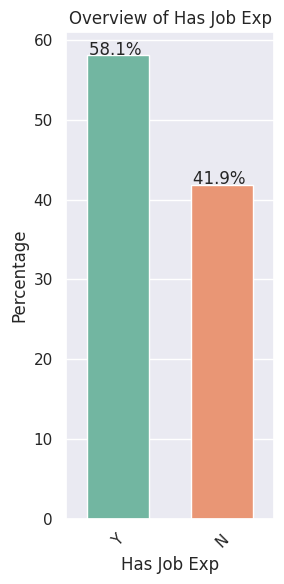

In [40]:
# Bar chart on prior job exp among applicants
plot_bar_chart_percentage(ezdf,'has_job_experience','Has Job Exp',pellete=pellete)

### Observations:
The majority of the applicants have relevant job exp (58.1%) where as 41.9% doesnot have prior exp .It will be intresting to see if this field has any effect on the approval or certified.

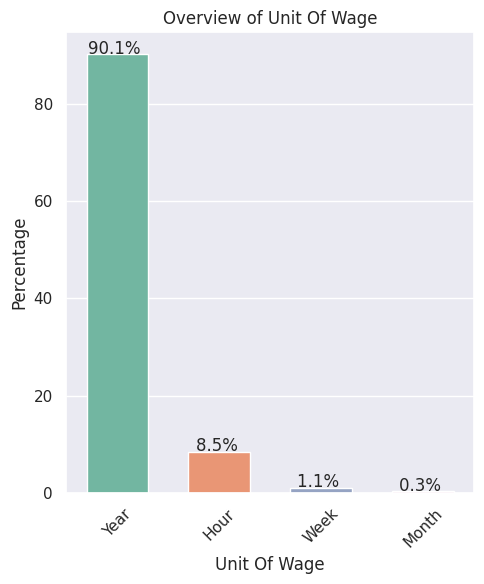

In [42]:
# Bar chart on wage rate of employee
plot_bar_chart_percentage(ezdf,'unit_of_wage','Unit Of Wage',pellete=pellete)

### Observations:
- Most of the applicants are for yearly wage (90.1%) followed by 8.5% who are having hourly wage.
- Weekly monthly has very limited number of applicants.


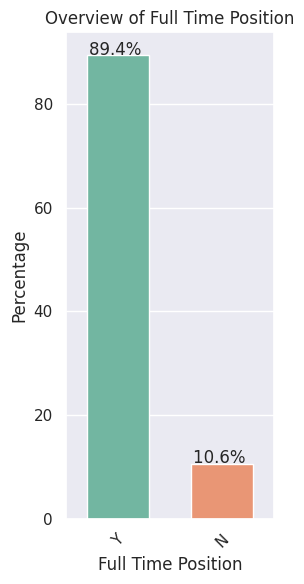

In [43]:
# Bar chart on education_of_employee to check which degree has highest visa application
plot_bar_chart_percentage(ezdf,'full_time_position','Full Time Position',pellete=pellete)

### Observations:
Most of the applicants are applying for full time positions(89%)

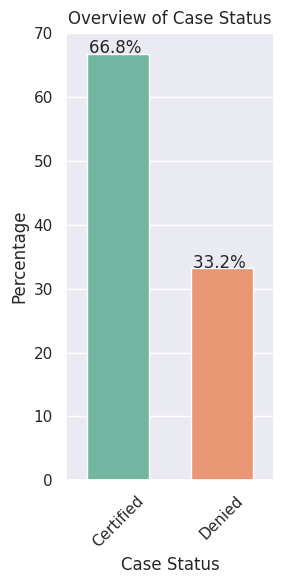

In [44]:
# Bar chart on education_of_employee to check which degree has highest visa application
plot_bar_chart_percentage(ezdf,'case_status','Case Status',pellete=pellete)

### Observations:
Around 66.8% of visa applications are certified and around 33% are denied .We might have to check what parameters are affecting the approval

In [ ]:
# Histogram and boxplot for distribution of prevailing_wage

plot_histogram_and_boxplot(df=ezdf,column='no_of_employees',xlabel='no_of_employees',ylabel='Distribution of Total Workers',title='Distribution of Total Workers')

### Observations:
- Min no of employees in a orgnisation is 11 who applied for visa .The max value is above .6 million where as 75th percentile is around 3504.
Either there a big orgnaisation who has apllied visa for its employee or the entry is wrong .
-  This field has so many outliers.

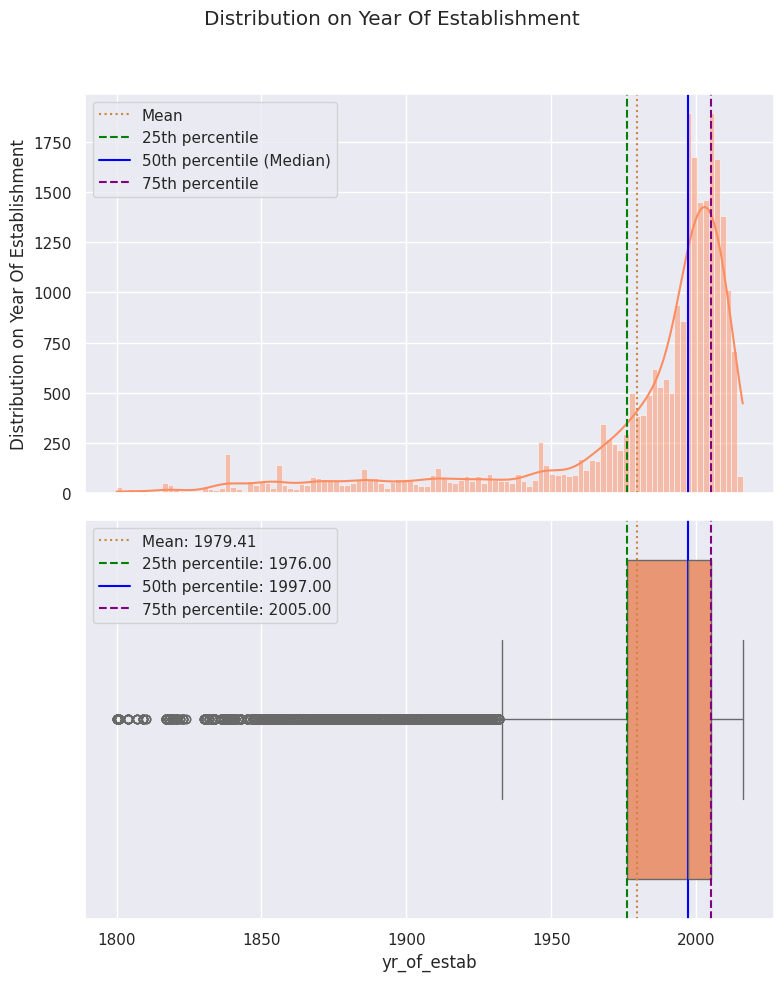

In [77]:
# Histogram and boxplot for distribution of yr_of_estab

plot_histogram_and_boxplot(df=ezdf,column='yr_of_estab',xlabel='yr_of_estab',ylabel='Distribution on Year Of Establishment',title='Distribution on Year Of Establishment')

### Observations:
- The distribution is skewed towards left.Some of the organisation  established before 1800 and max value for this field is 2016

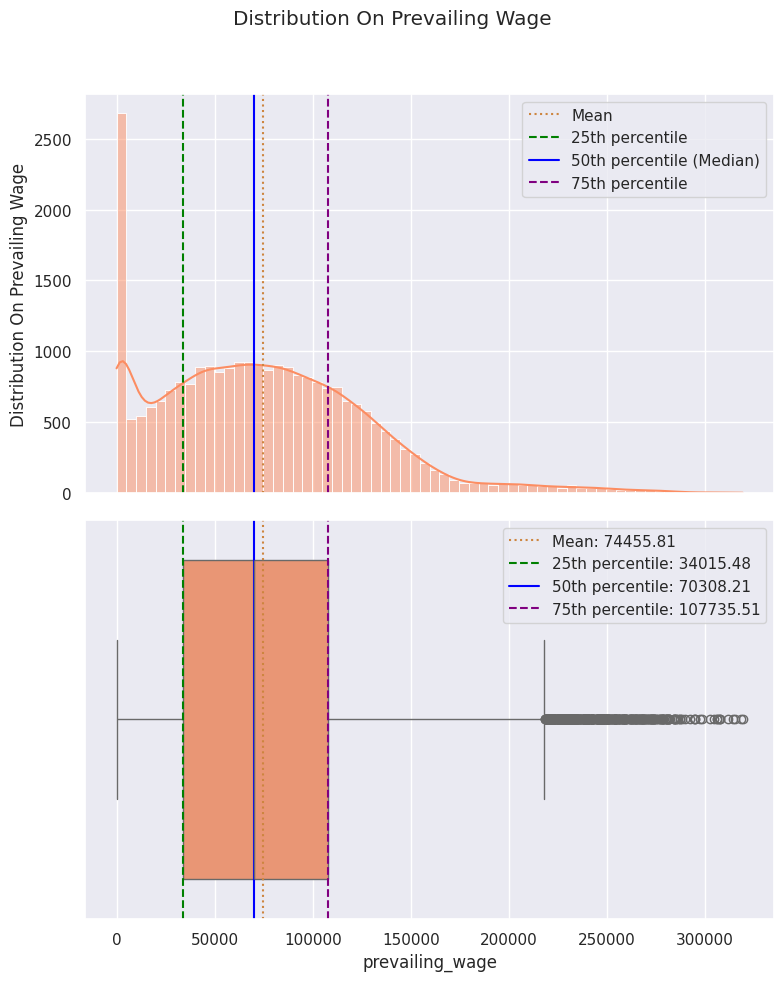

In [76]:
# Histogram and boxplot for distribution of prevailing_wage
plot_histogram_and_boxplot(df=ezdf,column='prevailing_wage',xlabel='prevailing_wage',ylabel='Distribution On Prevailing Wage',title='Distribution On Prevailing Wage')

### Observations:
- The dataset is skewed towards right .There are many outliers for this column as the max wage ranging to 319210.27.Which is quite higher then 75 percentile of the data (107735)
- The mean of this column is around 74455.81